In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Blackjack_simulator.csv")

In [3]:
df.columns

Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   shoe_id             int64  
 1   cards_remaining     int64  
 2   dealer_up           int64  
 3   initial_hand        object 
 4   dealer_final        object 
 5   dealer_final_value  object 
 6   player_final        object 
 7   player_final_value  object 
 8   actions_taken       object 
 9   run_count           int64  
 10  true_count          int64  
 11  win                 float64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.5+ GB


In [ ]:
#Taking out a percentage of the data to make the cleaning and data analysis easier
rows_to_drop = df[ df['shoe_id'] > int( ( 0.01 * df['shoe_id'].max() ) ) ].index

In [ ]:
df = df.drop(rows_to_drop)

In [ ]:
df.info()

In [ ]:
df['shoe_id'].max()

In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
#df.to_csv("C:\\Users\\aroop\\Documents\\DS100_SP24\\New_Blackjack1.csv")

### begin to seperate the strings to make the columns usable

In [ ]:
#Original Method:
#df['initial_hand'][1].replace("[","").replace("]","").replace("'","").split(',')[0]

In [ ]:
#found better function to change the strings directly to lists

df['initial_hand_lst'] = df['initial_hand'].apply(lambda x: eval(x) if x is not None else None)
df['actions_taken_lst'] = df['actions_taken'].apply(lambda x: eval(x) if x is not None else None)
df['dealer_final_lst'] = df['dealer_final'].apply(lambda x: eval(x) if x is not None else None)
df['player_final_lst'] = df['player_final'].apply(lambda x: eval(x) if x is not None else None)
df['player_final_value_lst'] = df['player_final_value'].apply(lambda x: eval(x) if x is not None else None)



In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# max numberof hands a player would have 
# meaning that some hands have split 4 times
df['player_final_value_lst'].apply(len).max()


In [ ]:
#drop all rows where theres multiple splits
df = df[df['player_final_value_lst'].apply(len) <= 2]

In [ ]:
df['player_final_value_lst'].apply(len).max()

In [ ]:
#seperating out the players inital hands where all the original moves are made for the player
df['initial_hand_one'] = df['initial_hand_lst'].apply(lambda list: list[0])
df['initial_hand_two'] = df['initial_hand_lst'].apply(lambda list: list[1])

In [ ]:
#seperate the list of actions and player cards into their own seperate lists
df['player_final_hand_one'] = df['player_final_lst'].apply(lambda list: list[0] if list[0] is not None else None)
df['player_final_hand_two'] = df['player_final_lst'].apply(lambda list: list[1] if len(list) >1  is not None else None)

df['player_actions_one'] = df['actions_taken_lst'].apply(lambda list: list[0] if list[0] is not None else None)
df['player_actions_two'] = df['actions_taken_lst'].apply(lambda list: list[1] if len(list)>1 is not None else None)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#find the max amount of moves a player has had
df['player_actions_one'].apply(len).max()

In [ ]:
#remove hands where the player makes over 5 moves
df = df[df['player_actions_one'].apply(len) <= 5]

In [ ]:
df['player_actions_one'].apply(len).max()

In [ ]:
df['player_final_hand_one'].apply(len).max()

In [ ]:
df['player_actions_two'].apply(lambda x: len(x) if x is not None else None).max()

In [ ]:
df['player_actions_two'].apply(lambda x: len(x) if x is not None else None).max()

In [ ]:
def remove_first_value(lst):
    if lst and lst[0] == 'N':
        return lst[1:] 
    else:
        return lst  

df['actions_one_lst'] = df['player_actions_one'].apply(remove_first_value)

In [ ]:
#seperate individual moves 
df['player_moveset_one_move_one']=df['player_actions_one'].apply(lambda lst: (lst[0] if len(lst)>0 else None) if lst != None else None)
df['player_moveset_one_move_two']=df['player_actions_one'].apply(lambda lst: (lst[1] if len(lst)>1 else None) if lst != None else None)
df['player_moveset_one_move_three']=df['player_actions_one'].apply(lambda lst: (lst[2] if len(lst)>2 else None) if lst != None else None)
df['player_moveset_one_move_four']=df['player_actions_one'].apply(lambda lst: (lst[3] if len(lst)>3 else None) if lst != None else None)
df['player_moveset_one_move_five']=df['player_actions_one'].apply(lambda lst: (lst[4] if len(lst)>4 else None) if lst != None else None)


df['player_moveset_two_move_one']=df['player_actions_two'].apply(lambda lst: (lst[0] if len(lst)>0 else None) if lst != None else None)
df['player_moveset_two_move_two']=df['player_actions_two'].apply(lambda lst: (lst[1] if len(lst)>1 else None) if lst != None else None)
df['player_moveset_two_move_three']=df['player_actions_two'].apply(lambda lst: (lst[2] if len(lst)>2 else None) if lst != None else None)
df['player_moveset_two_move_four']=df['player_actions_two'].apply(lambda lst: (lst[3] if len(lst)>3 else None) if lst != None else None)
df['player_moveset_two_move_five']=df['player_actions_two'].apply(lambda lst: (lst[4] if len(lst)>4 else None) if lst != None else None)


In [ ]:
#drop hands where the plaeyr surrenders
df.drop(index = df[df['player_moveset_one_move_one'] == 'R'].index, inplace = True)

In [ ]:
df['player_final_hand_one_card_one']=df['player_final_hand_one'].apply(lambda lst: (lst[0] if len(lst)>0 else None) if lst != None else None)
df['player_final_hand_one_card_two']=df['player_final_hand_one'].apply(lambda lst: (lst[1] if len(lst)>1 else None) if lst != None else None)
df['player_final_hand_one_card_three']=df['player_final_hand_one'].apply(lambda lst: (lst[2] if len(lst)>2 else None) if lst != None else None)
df['player_final_hand_one_card_four']=df['player_final_hand_one'].apply(lambda lst: (lst[3] if len(lst)>3 else None) if lst != None else None)
df['player_final_hand_one_card_five']=df['player_final_hand_one'].apply(lambda lst: (lst[4] if len(lst)>4 else None) if lst != None else None)
df['player_final_hand_one_card_six']=df['player_final_hand_one'].apply(lambda lst: (lst[5] if len(lst)>5 else None) if lst != None else None)
df['player_final_hand_one_card_seven']=df['player_final_hand_one'].apply(lambda lst: (lst[6] if len(lst)>6 else None) if lst != None else None)

df['player_final_hand_two_card_one']=df['player_final_hand_two'].apply(lambda lst: (lst[0] if len(lst)>0 else None) if lst != None else None)
df['player_final_hand_two_card_two']=df['player_final_hand_two'].apply(lambda lst: (lst[1] if len(lst)>1 else None) if lst != None else None)
df['player_final_hand_two_card_three']=df['player_final_hand_two'].apply(lambda lst: (lst[2] if len(lst)>2 else None) if lst != None else None)
df['player_final_hand_two_card_four']=df['player_final_hand_two'].apply(lambda lst: (lst[3] if len(lst)>3 else None) if lst != None else None)
df['player_final_hand_two_card_five']=df['player_final_hand_two'].apply(lambda lst: (lst[4] if len(lst)>4 else None) if lst != None else None)


In [ ]:
df.columns

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(df.notnull())

In [ ]:
sns.heatmap(df.corr())

In [ ]:
def assign_number(char):
    if char == 'S':
        return (1)
    elif char == 'H':
        return int(2)
    elif char == 'D':
        return int(3)
    elif char == 'P':
        return int(4)
    else:
        return None  # Return None if the input is empty or doesn't match any condition




In [ ]:
df['player_moveset_one_move_one'] = df['player_moveset_one_move_one'].apply(assign_number)
df['player_moveset_one_move_two'] = df['player_moveset_one_move_two'].apply(assign_number)
df['player_moveset_one_move_three'] = df['player_moveset_one_move_three'].apply(assign_number)
df['player_moveset_one_move_four'] = df['player_moveset_one_move_four'].apply(assign_number)
df['player_moveset_one_move_five'] = df['player_moveset_one_move_five'].apply(assign_number)

df['player_moveset_two_move_one'] = df['player_moveset_two_move_one'].apply(assign_number)
df['player_moveset_two_move_two'] = df['player_moveset_two_move_two'].apply(assign_number)
df['player_moveset_two_move_three'] = df['player_moveset_two_move_three'].apply(assign_number)
df['player_moveset_two_move_four'] = df['player_moveset_two_move_four'].apply(assign_number)
df['player_moveset_two_move_five'] = df['player_moveset_two_move_five'].apply(assign_number)



In [ ]:
df['player_moveset_one_move_one'].head(20)

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['win'].unique()

In [ ]:
df['initial total'] = df['initial_hand_one'] + df['initial_hand_two']

In [ ]:
df.head()

In [ ]:
df['win'][df['win']>0] = 1.0
df['win'][df['win']<0] = -1.0
df['win'].unique()

In [ ]:
sns.countplot(data = df , x = 'player_moveset_one_move_one')

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
eda = df.drop(columns = ['initial_hand',
       'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken','initial_hand_lst', 'actions_taken_lst', 'dealer_final_lst',
       'player_final_lst', 'player_final_value_lst', 'initial_hand_one',
       'initial_hand_two', 'player_final_hand_one', 'player_final_hand_two',
       'player_actions_one', 'player_actions_two','player_moveset_one_move_two',
       'player_moveset_one_move_three', 'player_moveset_one_move_four',
       'player_moveset_one_move_five', 'player_moveset_two_move_one',
       'player_moveset_two_move_two', 'player_moveset_two_move_three',
       'player_moveset_two_move_four', 'player_moveset_two_move_five',
       'player_final_hand_one_card_one', 'player_final_hand_one_card_two',
       'player_final_hand_one_card_three', 'player_final_hand_one_card_four',
       'player_final_hand_one_card_five', 'player_final_hand_one_card_six',
       'player_final_hand_one_card_seven', 'player_final_hand_two_card_one',
       'player_final_hand_two_card_two', 'player_final_hand_two_card_three',
       'player_final_hand_two_card_four', 'player_final_hand_two_card_five',
       'actions_one_lst','player_final_hand_one_card_six','player_final_hand_one_card_seven' ], axis = 1)

In [ ]:
eda['move'] = eda['player_moveset_one_move_one']

In [ ]:
eda['dealer up'] = eda['dealer_up']

In [ ]:
eda.info()

In [ ]:
sns.pairplot(eda)

In [ ]:
sns.distplot( eda['win'], kde = False)

In [ ]:
sns.distplot( eda['move'], kde = False)

In [ ]:
sns.jointplot(data = eda, y = 'dealer up', x = 'initial total', hue = 'move', palette = 'Set1')

In [ ]:
sns.heatmap(eda.corr())

In [ ]:
sns.histplot(data = eda, x = 'initial total', bins = 10)

In [ ]:
eda['cards remaining'] = eda['cards_remaining']

In [ ]:
eda['true count'] = eda['true_count']

In [ ]:
sns.histplot(data = eda, x = 'dealer up', bins = 10)

In [ ]:
sns.histplot(data = eda, hue= 'move', x = 'true count', y = 'cards remaining', bins = 60, palette = 'Set1')

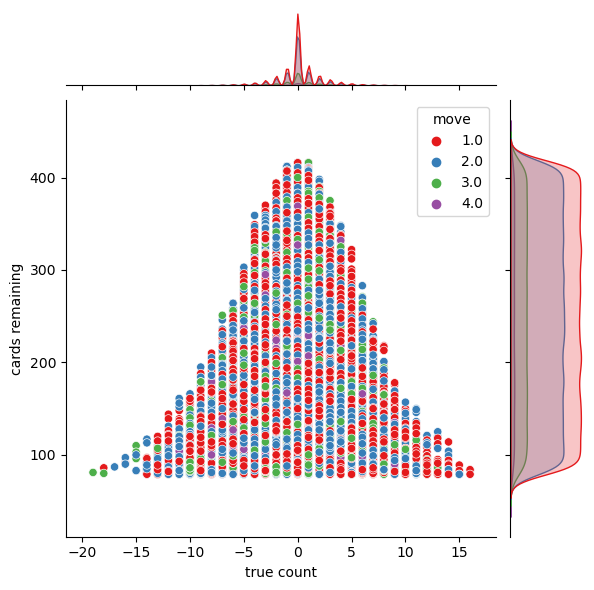

In [77]:
sns.jointplot(data = eda, x = 'true count', y = 'cards remaining', hue = 'move', palette = 'Set1')

In [ ]:
eda.to_csv("New_Blackjack.csv")